# Tutorial #1: TMDB Movie Data Analysis

### Learning objective

**What shall be your key takeaways from this project?**
1. What are some good questions to ask looking at a dataset?
2. Data Wrangling
3. Exploratory Data Analysis
4. Collaborate, visualise, and communicate.


### Background
What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?

This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films.

In [1]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

### Let's load the data

In [2]:
# Let's load the dataset and create their dataframes

credits_df = pd.read_csv('./tmdb-5000-movie-dataset/tmdb_5000_credits.csv')
movies_df = pd.read_csv('./tmdb-5000-movie-dataset/tmdb_5000_movies.csv')
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Looking at this dataset, we need to define a set of questions.

**Let's define those primary questions here:**
1. Which are the 5 most expensive movies? Comparison between the extremes.
2. Top 5 most profitable movies? Comparison between the min and max profits.
3. Most talked about Movies?
4. Average runtime of movies?
5. Movies which are rated above 7 by the critics?
6. Which year did we have the most profitable movies?

**Then there will be a set of seconday questions related to the questions above**
1. Most successful genre.
2. Frequent Cast in movies.
3. Average budget of the profitable movies.
4. Average duration of the most profitable movies.
5. Language of the most profitable movies.

In [3]:
# merging the two files
movies_df = pd.merge(movies_df, credits_df, left_on ='id', right_on='movie_id', how='left', suffixes=('', '_y'))

movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'crew'],
      dtype='object')

### Data Cleaning Process

>After observing the dataset and proposed questions for the analysis we will be keeping only relevent data deleting the unsued data so that we can make our calculation easy and understandable. .

> Steps to be taken to clean the data.
1. We need to remove unused column such as id, imdb_id, vote_count, production_company, keywords, homepage etc.
2. Removing the duplicacy in the rows(if any).
3. Some movies in the database have zero budget or zero revenue, that is there value has not been recorded so we will be discarding such entries.
4. Changing release date column into date format.
5. Replacing zero with NAN in runtime column.
6. Changing format of budget and revenue column.



In [4]:
# First step is to clean the data and see which are the redundant or unnecessary cols

del_col_list = ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 
                'overview', 'production_companies', 'original_title', 'title_y']

movies_df = movies_df.drop(del_col_list, axis=1)
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### How to handle the Json in Dataset?

>The main problem with this dataset is the .json format. Many columns in the dataset are in json format, therefore cleaning the dataset was the main challenge. For people who don't know about JSON(JavaScript Object Notation), it is basically a syntax for storing and exchanging data between two computers. It is mainly in a key:value format, and is embedded into a string.

In [5]:
# we see that there are columns which are in json format,
# let's flatten these json data into easyily interpretable lists

def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
parse_col_json('cast', 'name')
parse_col_json('production_countries', 'name')

movies_df.head()


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,19995,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,285,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,206647,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,49026,"['Christian Bale', 'Michael Caine', 'Gary Oldm...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,49529,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
#  dropping the duplicates from the dataset.
print(movies_df.shape)
movies_df = movies_df.drop_duplicates(keep='first')
print(movies_df.shape)

(4803, 15)
(4803, 15)


In [7]:
# replacing all the zeros from revenue and budget cols.

cols = ['budget', 'revenue']
movies_df[cols] = movies_df[cols].replace(0, np.nan)

# dropping all the rows with na in the columns mentioned above in the list.
movies_df.dropna(subset=cols, inplace=True)
movies_df.shape


(3229, 15)

In [8]:
# Changing the release_date column to DateTime column

movies_df.release_date = pd.to_datetime(movies_df['release_date'])
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew
0,237000000.0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2.787965e+09,162.0,"['English', 'Español']",Avatar,7.2,11800,19995,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000.0,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,9.610000e+08,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,285,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000.0,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,8.806746e+08,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,206647,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000.0,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1.084939e+09,165.0,['English'],The Dark Knight Rises,7.6,9106,49026,"['Christian Bale', 'Michael Caine', 'Gary Oldm...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000.0,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,2.841391e+08,132.0,['English'],John Carter,6.1,2124,49529,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### To answer the last question, we'll be needing the release year from the release_date

In [9]:
# To answer the last question, we'll have to extract the release year from every release date
movies_df['release_year'] = movies_df['release_date'].dt.year
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew,release_year
0,237000000.0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2.787965e+09,162.0,"['English', 'Español']",Avatar,7.2,11800,19995,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009
1,300000000.0,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,9.610000e+08,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,285,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007
2,245000000.0,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,8.806746e+08,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,206647,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015
3,250000000.0,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1.084939e+09,165.0,['English'],The Dark Knight Rises,7.6,9106,49026,"['Christian Bale', 'Michael Caine', 'Gary Oldm...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012
4,260000000.0,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,2.841391e+08,132.0,['English'],John Carter,6.1,2124,49529,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012


In [10]:
# Changing the data type of the below mentioned columns and 
change_cols=['budget', 'revenue']
#changing data type
movies_df[change_cols]=movies_df[change_cols].applymap(np.int64)
movies_df.dtypes


budget                           int64
genres                          object
id                               int64
popularity                     float64
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
title                           object
vote_average                   float64
vote_count                       int64
movie_id                         int64
cast                            object
crew                            object
release_year                     int64
dtype: object

## Let's answer Question #1

In [11]:
# Answer to question #1.
# To find out the most expensive movies, we need to look at the budget set for them which is an indicator of expense.

expensive_movies_df = movies_df.sort_values(by ='budget', ascending=False).head()
expensive_movies_df

# below are the 5 most expensive movies in descending order.

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew,release_year
17,380000000,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,1045713802,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,6.4,4948,1865,"['Johnny Depp', 'Penélope Cruz', 'Ian McShane'...","[{""credit_id"": ""566b4f54c3a3683f56005151"", ""de...",2011
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,285,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,99861,"['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de...",2015
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,['United States of America'],2006-06-28,391081192,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,5.4,1400,1452,"['Brandon Routh', 'Kevin Spacey', 'Kate Boswor...","[{""credit_id"": ""553bef6a9251416874003c8f"", ""de...",2006
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,49529,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012


### Since we need to compare the minimums and maximums in 3 questions, we can write a generi function to do that for us. It will remove all the redundancy in code for such questions.


In [12]:
def find_min_max_in(col):
    """
    The function takes in a column and returns the top 5
    and bottom 5 movies dataframe in that column.
    
    args:
        col: string - column name
    return:
        info_df: dataframe - final 5 movies dataframe
    """
    
    top = movies_df[col].idxmax()
    top_df = pd.DataFrame(movies_df.loc[top])
    
    bottom = movies_df[col].idxmin()
    bottom_df = pd.DataFrame(movies_df.loc[bottom])
    
    info_df = pd.concat([top_df, bottom_df], axis=1)
    return info_df

find_min_max_in('budget')

,17,4238
budget,380000000,1
genres,"['Adventure', 'Action', 'Fantasy']","['Drama', 'Comedy']"
id,1865,3082
popularity,135.414,28.2765
production_countries,['United States of America'],['United States of America']
release_date,2011-05-14 00:00:00,1936-02-05 00:00:00
revenue,1045713802,8500000
runtime,136,87
spoken_languages,"['English', 'Español']",['English']
title,Pirates of the Caribbean: On Stranger Tides,Modern Times


## Answer to Question #2

In [13]:
# to find the most profitable movies, we need to find who made the most 
# amount after deducting the budget from the revenue generated.

movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
cols = ['budget',
         'profit',
         'revenue',
         'genres',
         'id',
         'popularity',
         'production_countries',
        'release_date',
        'release_year',
         'runtime',
         'spoken_languages',
         'title',
        'cast',
         'vote_average',
         'vote_count']
movies_df = movies_df[cols]
movies_df.sort_values(by = ['budget'], ascending=False).head()


,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,cast,vote_average,vote_count
17,380000000,665713802,1045713802,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,2011,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,"['Johnny Depp', 'Penélope Cruz', 'Ian McShane'...",6.4,4948
1,300000000,661000000,961000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,2007,169.0,['English'],Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",6.9,4500
7,280000000,1125403694,1405403694,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,2015,141.0,['English'],Avengers: Age of Ultron,"['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...",7.3,6767
10,270000000,121081192,391081192,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,['United States of America'],2006-06-28,2006,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,"['Brandon Routh', 'Kevin Spacey', 'Kate Boswor...",5.4,1400
4,260000000,24139100,284139100,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,2012,132.0,['English'],John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",6.1,2124


In [14]:
# Comparison between min and max profits
find_min_max_in('profit')

,0,13
budget,237000000,255000000
profit,2550965087,-165710090
revenue,2787965087,89289910
genres,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['Action', 'Adventure', 'Western']"
id,19995,57201
popularity,150.438,49.047
production_countries,"['United States of America', 'United Kingdom']",['United States of America']
release_date,2009-12-10 00:00:00,2013-07-03 00:00:00
release_year,2009,2013
runtime,162,149


In [15]:
# to find the most talked about movies, we can sort the dataframe on the popularity column
popular_movies_df = movies_df.sort_values(by ='budget', ascending=False).head()
popular_movies_df.head()

,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,cast,vote_average,vote_count
17,380000000,665713802,1045713802,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,2011,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,"['Johnny Depp', 'Penélope Cruz', 'Ian McShane'...",6.4,4948
1,300000000,661000000,961000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,2007,169.0,['English'],Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",6.9,4500
7,280000000,1125403694,1405403694,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,2015,141.0,['English'],Avengers: Age of Ultron,"['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...",7.3,6767
10,270000000,121081192,391081192,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,['United States of America'],2006-06-28,2006,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,"['Brandon Routh', 'Kevin Spacey', 'Kate Boswor...",5.4,1400
4,260000000,24139100,284139100,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,2012,132.0,['English'],John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",6.1,2124


In [16]:
# in terms of popularity score
find_min_max_in('popularity')

,546,3921
budget,74000000,3000000
profit,1082730962,3804016
revenue,1156730962,6804016
genres,"['Family', 'Animation', 'Adventure', 'Comedy']",['Drama']
id,211672,44634
popularity,875.581,0.019984
production_countries,['United States of America'],['United States of America']
release_date,2015-06-17 00:00:00,2004-09-30 00:00:00
release_year,2015,2004
runtime,91,94


## Answer to question #3

In [17]:
# in terms of runtime
find_min_max_in('runtime')

,2384,3626
budget,18000000,5000000
profit,-17128721,-925977
revenue,871279,4074023
genres,"['Crime', 'Drama', 'Thriller', 'History']",['Documentary']
id,43434,78394
popularity,1.13838,4.49837
production_countries,"['France', 'Germany']","['France', 'United Kingdom']"
release_date,2010-05-19 00:00:00,2010-05-14 00:00:00
release_year,2010,2010
runtime,338,41


In [18]:
# Average runtime of movies
 
movies_df['runtime'].mean()

110.72437287085785

## Answer to question #4

In [19]:
# movies rated above 7 

movies_df[movies_df['vote_average'] >= 7.0]

,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,cast,vote_average,vote_count
0,237000000,2550965087,2787965087,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2009,162.0,"['English', 'Español']",Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",7.2,11800
3,250000000,834939099,1084939099,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,2012,165.0,['English'],The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",7.6,9106
6,260000000,331794936,591794936,"['Animation', 'Family']",38757,48.681969,['United States of America'],2010-11-24,2010,100.0,['English'],Tangled,"['Zachary Levi', 'Mandy Moore', 'Donna Murphy'...",7.4,3330
7,280000000,1125403694,1405403694,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,2015,141.0,['English'],Avengers: Age of Ultron,"['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...",7.3,6767
8,250000000,683959197,933959197,"['Adventure', 'Fantasy', 'Family']",767,98.885637,"['United Kingdom', 'United States of America']",2009-07-07,2009,153.0,['English'],Harry Potter and the Half-Blood Prince,"['Daniel Radcliffe', 'Rupert Grint', 'Emma Wat...",7.4,5293
12,200000000,865659812,1065659812,"['Adventure', 'Fantasy', 'Action']",58,145.847379,"['Jamaica', 'United States of America', 'Baham...",2006-06-20,2006,151.0,"['English', 'Türkçe', 'ελληνικά', '普通话']",Pirates of the Caribbean: Dead Man's Chest,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",7.0,5246
16,220000000,1299557910,1519557910,"['Science Fiction', 'Action', 'Adventure']",24428,144.448633,['United States of America'],2012-04-25,2012,143.0,['English'],The Avengers,"['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...",7.4,11776
19,250000000,706019788,956019788,"['Action', 'Adventure', 'Fantasy']",122917,120.965743,"['New Zealand', 'United States of America']",2014-12-10,2014,144.0,['English'],The Hobbit: The Battle of the Five Armies,"['Martin Freeman', 'Ian McKellen', 'Richard Ar...",7.1,4760
22,250000000,708400000,958400000,"['Adventure', 'Fantasy']",57158,94.370564,"['New Zealand', 'United States of America']",2013-12-11,2013,161.0,['English'],The Hobbit: The Desolation of Smaug,"['Martin Freeman', 'Ian McKellen', 'Richard Ar...",7.6,4524
25,200000000,1645034188,1845034188,"['Drama', 'Romance', 'Thriller']",597,100.025899,['United States of America'],1997-11-18,1997,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",Titanic,"['Kate Winslet', 'Leonardo DiCaprio', 'Frances...",7.5,7562


## Answer to question #5

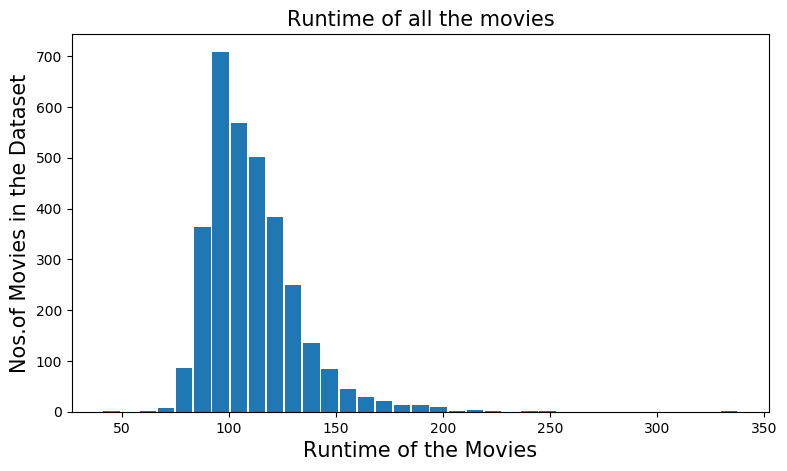

In [20]:
# Year we had the most number of profitable movies.
# we'll first have to define a profitable movies

#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(movies_df['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()


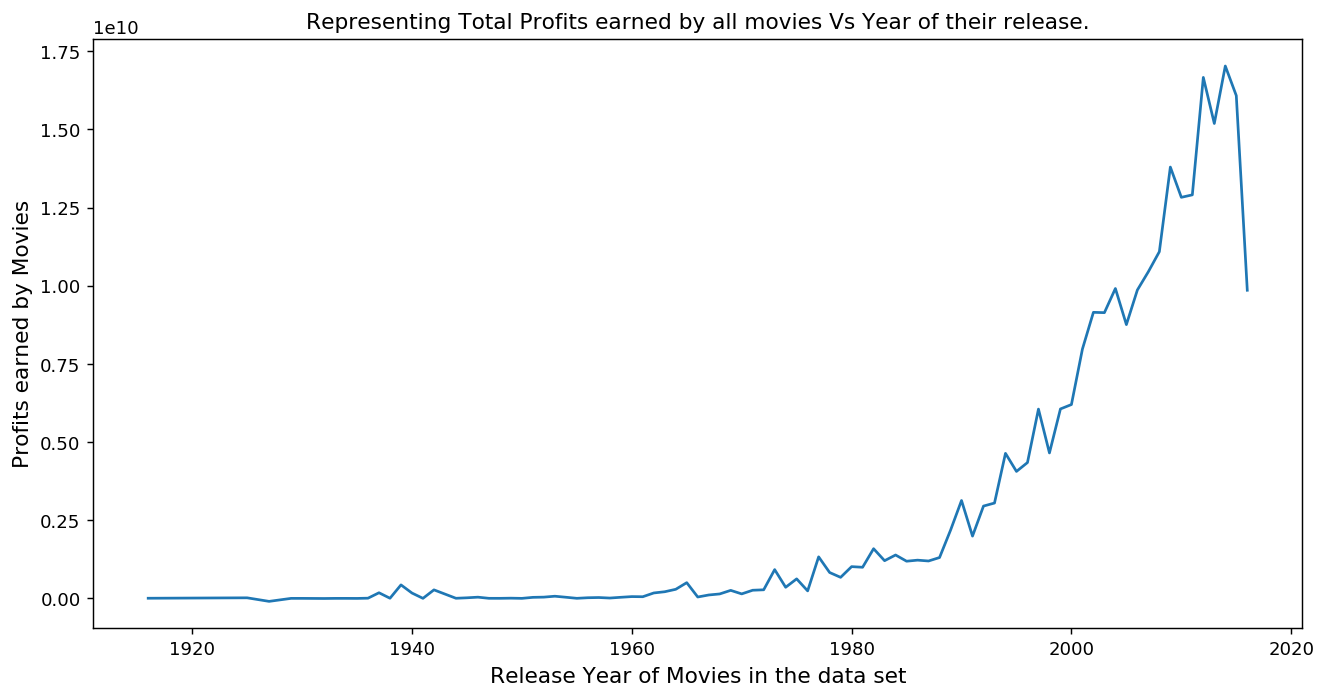

In [21]:
profits_year = movies_df.groupby('release_year')['profit'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

In [22]:
# Most profitable year from the given dataset.

profits_year.idxmax()

2014

In [23]:
#selecting the movies having profit $50M or more
profit_data = movies_df[movies_df['profit'] >= 50000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

#printing the changed dataset
profit_data.head(3)

,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,cast,vote_average,vote_count
1,237000000,2550965087,2787965087,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2009,162.0,"['English', 'Español']",Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",7.2,11800
2,300000000,661000000,961000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,2007,169.0,['English'],Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",6.9,4500
3,245000000,635674609,880674609,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,2015,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",6.3,4466


## Answer to secondary question #1

In [31]:
# formatting the data in the genres columns.
profit_data['genres']=profit_data['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')

profit_data['genres']=profit_data['genres'].str.split(',')

profit_data.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,cast,vote_average,vote_count
1,237000000,2550965087,2787965087,"[Action, Adventure, Fantasy, ScienceFiction]",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2009,162.0,"[English, Español]",Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",7.2,11800
2,300000000,661000000,961000000,"[Adventure, Fantasy, Action]",285,139.082615,['United States of America'],2007-05-19,2007,169.0,[English],Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",6.9,4500
3,245000000,635674609,880674609,"[Action, Adventure, Crime]",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,2015,148.0,"[Français, English, Español, Italiano, Deutsch]",Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",6.3,4466
4,250000000,834939099,1084939099,"[Action, Crime, Drama, Thriller]",49026,112.312950,['United States of America'],2012-07-16,2012,165.0,[English],The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",7.6,9106
5,258000000,632871626,890871626,"[Fantasy, Action, Adventure]",559,115.699814,['United States of America'],2007-05-01,2007,139.0,"[English, Français]",Spider-Man 3,"['Tobey Maguire', 'Kirsten Dunst', 'James Fran...",5.9,3576


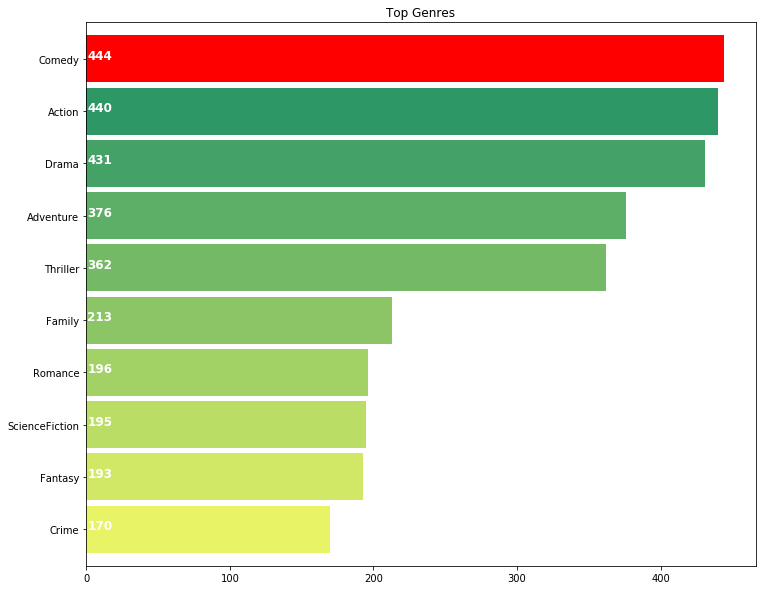

In [32]:
plt.subplots(figsize=(12,10))
list1=[]

# extending the list to 
for i in profit_data['genres']:
    list1.extend(i)
    
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(
    width=0.9,
    color=sns.color_palette('summer_r',10))

for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Top Genres')
plt.show()



> Comedy looks like the most preferred option to make profitable movies.

## Most frequent cast

### Let's try to find out the most frequent cast in the movies based on which we can tell about the success factor of the cast.


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


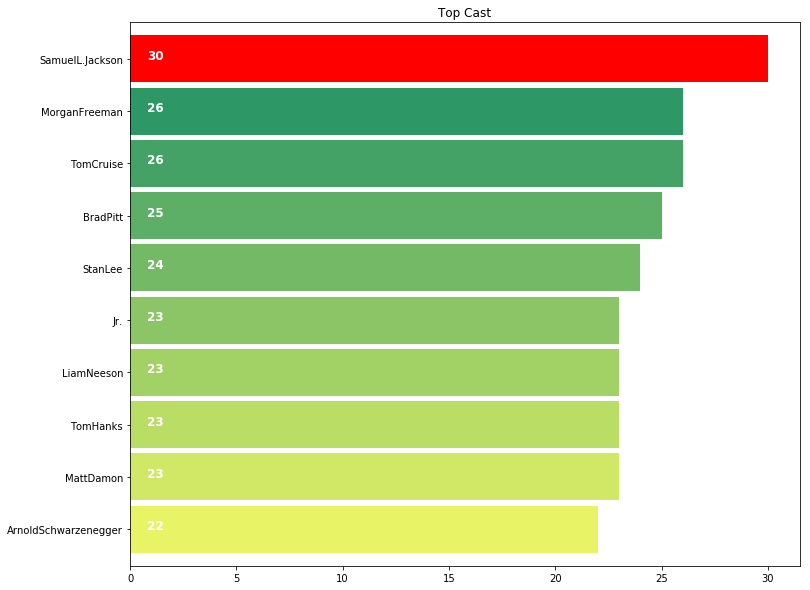

In [33]:

profit_data['cast']=profit_data['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
profit_data['cast']=profit_data['cast'].str.split(',')

plt.subplots(figsize=(12,10))
list1=[]
for i in profit_data['cast']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer_r',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Top Cast')
plt.show()

> Samuel Jackson seems to be on top with 53 movies.

## Answer to secondary question #3

In [27]:
profit_data['profit'].mean()
profit_data['revenue'].mean()

262022090.17768925

## Answer to secondary question #4

In [28]:
profit_data['runtime'].mean()

114.37928286852589

## Answer to secondary question #5

In [29]:
profit_data['budget'].mean()

63032056.92111554

## Answer to secondary question #6

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


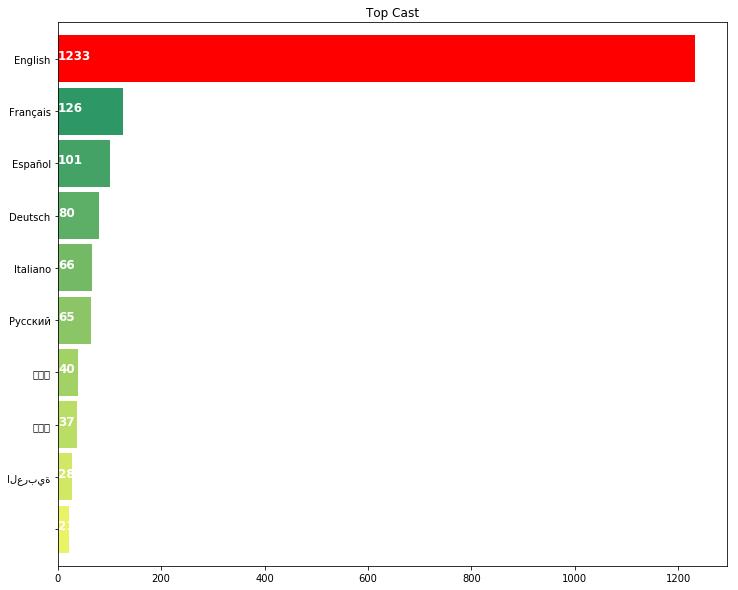

In [30]:
profit_data['spoken_languages']=profit_data['spoken_languages'].str.strip('[]').str.replace(' ','').str.replace("'",'')
profit_data['spoken_languages']=profit_data['spoken_languages'].str.split(',')

plt.subplots(figsize=(12,10))
list1=[]
for i in profit_data['spoken_languages']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer_r',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Top Cast')
plt.show()

> English seems to be the most profitable language.

## Conclusion

> This was a very interesting data analysis. We came out with some very interesting facts about movies. After this analysis we can conclude following:

> For a Movie to be in successful criteria

> Average Budget must be around 63 millon dollar
Average duration of the movie must be 114 minutes
Any one of these should be in the cast : Samuel Jackson, Robert De Neiro, Morgan Freeman, Bruce Willis
Genre must be : Action, Adventure, Thriller, Comedy, Drama.
By doing all this the movie might be one of the hits and hence can earn an average revenue of around 262 million dollar.
